Click this button to run in Colab.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/deep_learning_from_scratch/blob/master/ch06/batch_normalization.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

# %load batch_norm_test.py

In [2]:
# some helper functions for Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !git clone --filter=blob:none --sparse https://github.com/ssuai/deep_learning_from_scratch.git
    %cd deep_learning_from_scratch
    !git sparse-checkout set dataset common ch06
else:        
    sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

In [3]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [5]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

train_acc_all = []
bn_train_acc_all = []

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    train_acc_all.append(train_acc_list)
    bn_train_acc_all.append(bn_train_acc_list)

============== 1/16 ==============
epoch:0 | 0.093 - 0.106


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/yyoo/src/deep_learning_from_scratch/ch06/../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/yyoo/src/deep_learning_from_scratch/ch06/../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.1
epoch:2 | 0.097 - 0.114
epoch:3 | 0.097 - 0.116
epoch:4 | 0.097 - 0.138
epoch:5 | 0.097 - 0.164
epoch:6 | 0.097 - 0.192
epoch:7 | 0.097 - 0.221
epoch:8 | 0.097 - 0.237
epoch:9 | 0.097 - 0.249
epoch:10 | 0.097 - 0.265
epoch:11 | 0.097 - 0.283
epoch:12 | 0.097 - 0.308
epoch:13 | 0.097 - 0.332
epoch:14 | 0.097 - 0.333
epoch:15 | 0.097 - 0.355
epoch:16 | 0.097 - 0.37
epoch:17 | 0.097 - 0.394
epoch:18 | 0.097 - 0.409
epoch:19 | 0.097 - 0.418
============== 2/16 ==============
epoch:0 | 0.093 - 0.117
epoch:1 | 0.097 - 0.133
epoch:2 | 0.097 - 0.157
epoch:3 | 0.097 - 0.175
epoch:4 | 0.097 - 0.183
epoch:5 | 0.097 - 0.209
epoch:6 | 0.097 - 0.236
epoch:7 | 0.097 - 0.259
epoch:8 | 0.097 - 0.272
epoch:9 | 0.097 - 0.288
epoch:10 | 0.097 - 0.316
epoch:11 | 0.097 - 0.336
epoch:12 | 0.097 - 0.358
epoch:13 | 0.097 - 0.371
epoch:14 | 0.097 - 0.393
epoch:15 | 0.097 - 0.401
epoch:16 | 0.097 - 0.424
epoch:17 | 0.097 - 0.44
epoch:18 | 0.097 - 0.453
epoch:19 | 0.097 - 0.471
=============

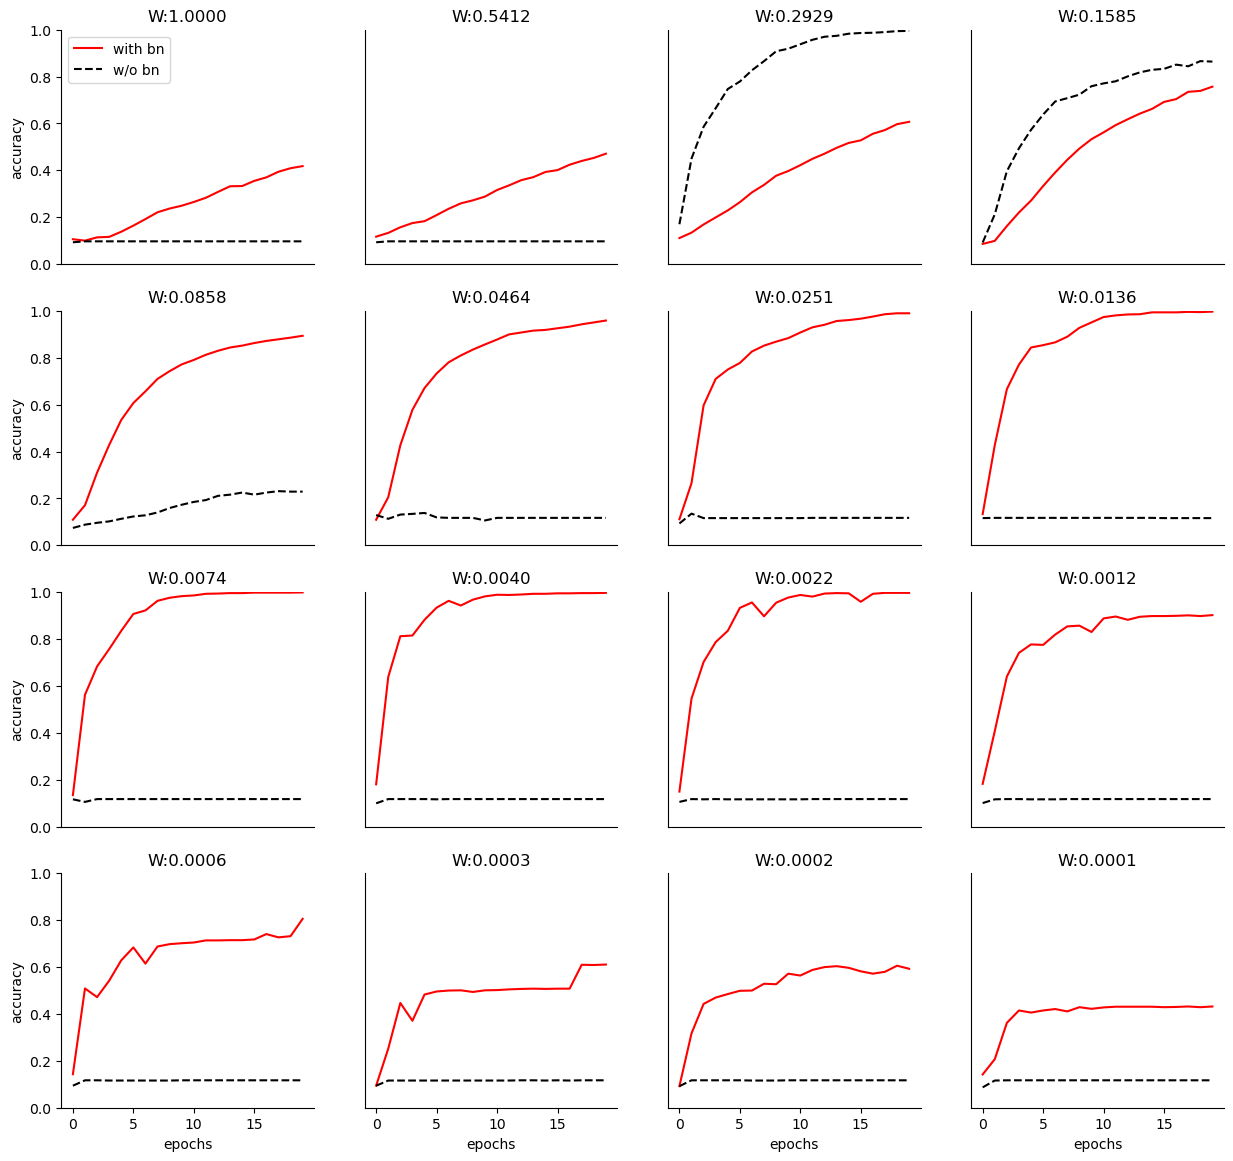

In [6]:
plt.figure(figsize=(15,14))  
for i, w in enumerate(weight_scale_list):
    train_acc_list = train_acc_all[i]
    bn_train_acc_list = bn_train_acc_all[i]

    plt.subplot(4,4,i+1)
    plt.title("W:" + "{:.4f}".format(w))
    
    plt.plot(x, bn_train_acc_list, c='r', markevery=2)
    plt.plot(x, train_acc_list, c='k', linestyle="--", markevery=2)
    if i == 0:
        plt.legend(['with bn','w/o bn'], loc='upper left')

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")

    sns.despine()